# Lesson 11 - Stock Prices
Austin Derrow-Pinion

In [1]:
import numpy as np
import pandas as pd
# import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

#### Part (a): How does the RMSE for you linear model compare to the standard deviation of the LogRatios?

In [3]:
df = pd.read_csv('./Data/Stocks15yr.csv')
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,ticker
0,2000-01-03,78.749999,78.937494,67.375004,72.000008,4674400,46.354670,A
1,2000-01-04,68.125003,68.875002,64.750005,66.499996,4765100,42.813681,A
2,2000-01-05,66.250003,66.499996,60.312503,62.374999,5758600,40.157947,A
3,2000-01-06,61.625000,62.000002,58.124998,59.999992,2534400,38.628883,A
4,2000-01-07,59.062492,65.937493,59.000006,64.999998,2819600,41.847960,A


In [4]:
# conert dates to date-time format
df['Date'] = pd.to_datetime(df.Date)
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Volume                int64
Adj Close           float64
ticker               object
dtype: object

In [5]:
# pivot closing prices
df = df.pivot(index='Date', columns='ticker', values='Close')
df.head(12)

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,72.000008,80.9375,111.937502,15.562480,34.999945,1.65,65.562477,90.1875,11.999995,51.999906,...,31.8125,19.0000,51.3750,46.7500,78.3125,23.49999,24.1875,475.0000,37.312481,55.50000
2000-01-04,66.499996,81.3125,102.500003,14.500000,33.999950,1.65,60.062481,85.6250,11.875005,51.999906,...,30.6250,19.4375,49.0625,45.6875,76.8125,23.49999,23.0625,443.0000,36.562481,52.81250
2000-01-05,62.374999,86.0000,103.999997,15.625000,33.937440,1.65,61.250000,86.8750,11.687503,51.499910,...,30.9375,20.1875,49.5000,44.6875,81.0000,23.90625,24.2500,410.5000,36.750000,52.75000
2000-01-06,59.999992,84.8750,94.999998,16.812481,35.124940,1.65,61.750000,84.5000,11.750004,52.187408,...,31.1250,20.0000,49.8750,40.8125,85.1875,23.93751,23.7500,368.1875,36.437519,53.50000
2000-01-07,64.999998,84.6250,99.500001,19.000000,35.499944,1.65,64.750000,86.8750,11.937494,53.374912,...,31.9375,20.0000,53.1875,45.4375,84.9375,23.87499,24.3125,407.2500,35.625000,53.62500
2000-01-10,68.937505,84.3750,97.750001,19.500000,35.249956,1.65,67.250000,94.4375,11.937494,54.687401,...,31.6875,20.0000,54.0000,47.7500,83.7500,24.43749,23.7500,436.0625,37.062481,52.65625
2000-01-11,68.000004,83.8750,92.750000,20.125000,34.749958,1.65,62.625000,90.5625,11.750004,53.624905,...,31.1875,20.0000,53.1250,43.9375,84.0000,24.43749,23.5000,397.3750,36.812481,49.87500
2000-01-12,66.625005,83.1250,87.187503,20.125000,34.062459,1.65,62.312481,93.5000,12.062496,53.124909,...,30.1875,20.4375,51.4375,43.9375,83.5000,23.90625,23.4375,357.5625,36.437519,50.31250
2000-01-13,67.625008,81.6250,96.749998,23.687519,33.749940,1.65,65.625000,93.8125,11.999995,52.812399,...,31.5000,20.3750,51.3750,45.2500,85.4375,24.93750,24.0625,346.8750,37.000000,54.68750


In [6]:
df.shape

(4173, 467)

In [7]:
# check for bad/missing values
df.isnull().sum().sum()

184024

In [8]:
# forward fill and black fill missing prices
df.fillna(method='ffill', axis=0).fillna(method='bfill', axis=0).isnull().sum().sum()

0

In [9]:
df = df.fillna(method='ffill', axis=0).fillna(method='bfill', axis=0)
df.head(13)

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,72.000008,80.9375,111.937502,15.562480,34.999945,1.65,65.562477,90.1875,11.999995,51.999906,...,31.8125,19.0000,51.3750,46.7500,78.3125,23.49999,24.1875,475.0000,37.312481,55.50000
2000-01-04,66.499996,81.3125,102.500003,14.500000,33.999950,1.65,60.062481,85.6250,11.875005,51.999906,...,30.6250,19.4375,49.0625,45.6875,76.8125,23.49999,23.0625,443.0000,36.562481,52.81250
2000-01-05,62.374999,86.0000,103.999997,15.625000,33.937440,1.65,61.250000,86.8750,11.687503,51.499910,...,30.9375,20.1875,49.5000,44.6875,81.0000,23.90625,24.2500,410.5000,36.750000,52.75000
2000-01-06,59.999992,84.8750,94.999998,16.812481,35.124940,1.65,61.750000,84.5000,11.750004,52.187408,...,31.1250,20.0000,49.8750,40.8125,85.1875,23.93751,23.7500,368.1875,36.437519,53.50000
2000-01-07,64.999998,84.6250,99.500001,19.000000,35.499944,1.65,64.750000,86.8750,11.937494,53.374912,...,31.9375,20.0000,53.1875,45.4375,84.9375,23.87499,24.3125,407.2500,35.625000,53.62500
2000-01-10,68.937505,84.3750,97.750001,19.500000,35.249956,1.65,67.250000,94.4375,11.937494,54.687401,...,31.6875,20.0000,54.0000,47.7500,83.7500,24.43749,23.7500,436.0625,37.062481,52.65625
2000-01-11,68.000004,83.8750,92.750000,20.125000,34.749958,1.65,62.625000,90.5625,11.750004,53.624905,...,31.1875,20.0000,53.1250,43.9375,84.0000,24.43749,23.5000,397.3750,36.812481,49.87500
2000-01-12,66.625005,83.1250,87.187503,20.125000,34.062459,1.65,62.312481,93.5000,12.062496,53.124909,...,30.1875,20.4375,51.4375,43.9375,83.5000,23.90625,23.4375,357.5625,36.437519,50.31250
2000-01-13,67.625008,81.6250,96.749998,23.687519,33.749940,1.65,65.625000,93.8125,11.999995,52.812399,...,31.5000,20.3750,51.3750,45.2500,85.4375,24.93750,24.0625,346.8750,37.000000,54.68750


In [10]:
# compute logs of closing prices
df1 = np.log(df)
df1.head()

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,4.276666,4.393677,4.717941,2.744863,3.555346,0.500775,4.183004,4.501891,2.484906,3.951242,...,3.459859,2.944439,3.939152,3.844814,4.360707,3.157000,3.185836,6.163315,3.619328,4.016383
2000-01-04,4.197202,4.398300,4.629863,2.674149,3.526359,0.500775,4.095385,4.449977,2.474436,3.951242,...,3.421817,2.967204,3.893095,3.821825,4.341367,3.157000,3.138208,6.093570,3.599023,3.966748
2000-01-05,4.133165,4.454347,4.644391,2.748872,3.524519,0.500775,4.114964,4.464470,2.458520,3.941580,...,3.431969,3.005064,3.901973,3.799694,4.394449,3.174140,3.188417,6.017376,3.604138,3.965564
2000-01-06,4.094344,4.441180,4.553877,2.822122,3.558911,0.500775,4.123094,4.436752,2.463854,3.954841,...,3.438011,2.995732,3.909520,3.708988,4.444855,3.175447,3.167583,5.908592,3.595599,3.979682
2000-01-07,4.174387,4.438230,4.600158,2.944439,3.569531,0.500775,4.170534,4.464470,2.479684,3.977341,...,3.463781,2.995732,3.973823,3.816338,4.441916,3.172831,3.190991,6.009427,3.573048,3.982015


In [11]:
# shit log price forward one day
df1.shift().head()

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,4.276666,4.393677,4.717941,2.744863,3.555346,0.500775,4.183004,4.501891,2.484906,3.951242,...,3.459859,2.944439,3.939152,3.844814,4.360707,3.157000,3.185836,6.163315,3.619328,4.016383
2000-01-05,4.197202,4.398300,4.629863,2.674149,3.526359,0.500775,4.095385,4.449977,2.474436,3.951242,...,3.421817,2.967204,3.893095,3.821825,4.341367,3.157000,3.138208,6.093570,3.599023,3.966748
2000-01-06,4.133165,4.454347,4.644391,2.748872,3.524519,0.500775,4.114964,4.464470,2.458520,3.941580,...,3.431969,3.005064,3.901973,3.799694,4.394449,3.174140,3.188417,6.017376,3.604138,3.965564
2000-01-07,4.094344,4.441180,4.553877,2.822122,3.558911,0.500775,4.123094,4.436752,2.463854,3.954841,...,3.438011,2.995732,3.909520,3.708988,4.444855,3.175447,3.167583,5.908592,3.595599,3.979682


In [12]:
# compute LogRatios
df2 = df1 - df1.shift()
df2 = df2.dropna()
df2.head(15)

ticker,A,AA,AAPL,ABC,ABT,ACS,ADBE,ADI,ADM,ADP,...,X,XEL,XL,XLNX,XOM,XRAY,XRX,YHOO,YUM,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.079464,0.004623,-0.088078,-0.070714,-0.028987,0.000000,-0.087618,-0.051914,-0.010470,0.000000,...,-0.038043,0.022765,-0.046057,-0.022990,-0.019340,0.000000,-0.047628,-0.069745,-0.020305,-0.049635
2000-01-05,-0.064037,0.056048,0.014528,0.074724,-0.001840,0.000000,0.019578,0.014493,-0.015916,-0.009662,...,0.010152,0.037859,0.008878,-0.022131,0.053082,0.017140,0.050209,-0.076194,0.005116,-0.001184
2000-01-06,-0.038820,-0.013168,-0.090514,0.073249,0.034393,0.000000,0.008130,-0.027719,0.005333,0.013261,...,0.006042,-0.009331,0.007547,-0.090705,0.050406,0.001307,-0.020834,-0.108784,-0.008539,0.014118
2000-01-07,0.080043,-0.002950,0.046281,0.122317,0.010620,0.000000,0.047440,0.027719,0.015831,0.022500,...,0.025770,0.000000,0.064304,0.107349,-0.002939,-0.002615,0.023408,0.100835,-0.022551,0.002334
2000-01-10,0.058813,-0.002959,-0.017744,0.025975,-0.007067,0.000000,0.037883,0.083468,0.000000,0.024293,...,-0.007859,0.000000,0.015161,0.049641,-0.014080,0.023287,-0.023408,0.068358,0.039558,-0.018230
2000-01-11,-0.013693,-0.005944,-0.052506,0.031548,-0.014286,0.000000,-0.071252,-0.041898,-0.015831,-0.019620,...,-0.015905,0.000000,-0.016336,-0.083211,0.002981,0.000000,-0.010582,-0.092905,-0.006768,-0.054265
2000-01-12,-0.020428,-0.008982,-0.061847,0.000000,-0.019982,0.000000,-0.005003,0.031921,0.026248,-0.009368,...,-0.032589,0.021639,-0.032280,0.000000,-0.005970,-0.021978,-0.002663,-0.105570,-0.010238,0.008734
2000-01-13,0.014898,-0.018210,0.104069,0.162985,-0.009217,0.000000,0.051795,0.003337,-0.005195,-0.005900,...,0.042560,-0.003063,-0.001216,0.029435,0.022938,0.042233,0.026317,-0.030346,0.015319,0.083382
2000-01-14,0.011030,-0.020109,0.037405,-0.065418,0.021979,0.000000,0.010421,0.077528,0.040822,-0.010708,...,-0.020041,0.003063,0.003643,0.062897,-0.019949,-0.012611,-0.020998,0.017504,-0.027399,0.016998


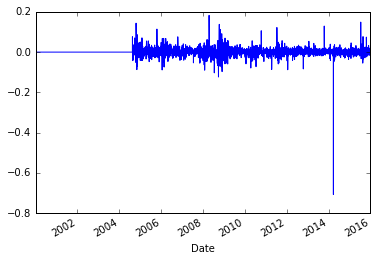

In [13]:
# plot Google's LogRatios
df2.GOOG.plot()

In [14]:
# look for stock splits
print('Google minimum LogRatio', df2.GOOG.min())
print('Google minimum price ratio', np.exp(df2.GOOG.min()))

Google minimum LogRatio -0.706528887594
Google minimum price ratio 0.493353714981


This looks like a stock split.

In [15]:
# compute standard deviation for all LogRatios
df2.values.std()

0.083225511293396462

In [16]:
# check for extreme variations
(df2.abs() > 0.1).sum().sum()

18533

In [28]:
# remove extreme variations
# FOR HOMEWORK: change this to "3*std", or 3 standard deviations away because 0.1 throws away too much data
df2[df2.abs() > 0.1] = 0

# check for extreme variations
(df2.abs() > 0.1).sum().sum()

0

In [18]:
# define inputs and outputs
inputs = df2.values[0:-1, :]
outputs = df2.values[1:,:]

print("Shapes:")
print(inputs.shape)
print(outputs.shape)

# today's values are used to predict tomorrow's value. So the data is shifted
print("\nSample values:")
print(inputs[0:3, 0:3])
print(outputs[0:3, 0:3])

Shapes:
(4171, 467)
(4171, 467)

Sample values:
[[-0.07946434  0.0046225  -0.08807787]
 [-0.06403735  0.05604754  0.01452804]
 [-0.03882011 -0.01316771 -0.090514  ]]
[[-0.06403735  0.05604754  0.01452804]
 [-0.03882011 -0.01316771 -0.090514  ]
 [ 0.08004281 -0.00294985  0.04628078]]


In [19]:
# load sklearn
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

In [20]:
# fir linear model
LR.fit(inputs, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# predict outputs
predictions = LR.predict(inputs)

In [22]:
# check Sklearn mean square error
mse = ((outputs - predictions) ** 2).mean()
rmse = np.sqrt(mse)
print('MSE = ', mse)
print('RMSE = ', rmse)
print('output\'s standard deviation = ', outputs.std())

MSE =  0.000342690777937
RMSE =  0.0185119090841
output's standard deviation =  0.0202444320225


#### Part (b): Plot scatter plot of actual LogRatios vs predicted LogRatios for Google Stock (GOOG)

In [23]:
print(outputs[0:3, 0:3])
print('\n', predictions[0:3, 0:3])

[[-0.06403735  0.05604754  0.01452804]
 [-0.03882011 -0.01316771 -0.090514  ]
 [ 0.08004281 -0.00294985  0.04628078]]

 [[-0.03098368 -0.00129852  0.01015088]
 [-0.00818232  0.010456   -0.02460348]
 [ 0.01110251  0.00604615  0.00898701]]


In [24]:
df2_sk = df2.copy()

In [25]:
df2_sk.iloc[1:, :] = predictions

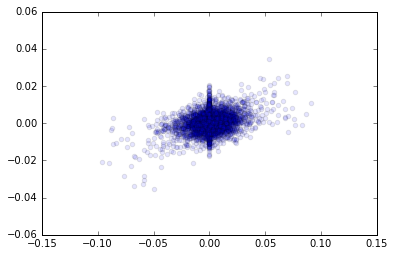

In [26]:
# actual logRatios are in df2, predicted LogRatios are in df2_sk
plt.scatter(x=df2.GOOG.values, y=df2_sk.GOOG.values, alpha=0.1)

In [27]:
print('correlation coefficient = ', df2.GOOG.corr(df2_sk.GOOG))

correlation coefficient =  0.355207436177
